In [1]:
# Set global utool flags
import utool as ut
ut.util_io.__PRINT_WRITES__ = False
ut.util_io.__PRINT_READS__ = False
ut.util_parallel.__FORCE_SERIAL__ = True
ut.util_cache.VERBOSE_CACHE = False
ut.NOT_QUIET = False

# Matplotlib stuff
%pylab inline
%load_ext autoreload
%autoreload

# Define database for this test run
import ibeis
db = 'PZ_Master1'
#db = 'GZ_ALL'
#db = 'NNP_MasterGIRM_core'
 
# Setup database specific configs
if db == 'PZ_MTEST' or db == 'GZ_ALL':
    seperability_annot_cfgs = ['ctrl']
else:
    seperability_annot_cfgs = ['timequalctrl']

if db == 'PZ_Master1':
    varysize = ['varysize_pzm']
    varypername = ['varypername_pzm']
elif db == 'GZ_ALL':
    varysize = ['varysize_gz']
    varypername = ['varypername_gz']
elif db == 'NNP_MasterGIRM_core':
    varysize = ['varysize_girm']
    varypername = ['varypername_girm']

`%matplotlib` prevents importing * from pylab and numpy
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Database Information

In [ ]:
import ibeis
ibs = ibeis.opendb(db=db)
ibeis.other.dbinfo.show_image_time_distributions(ibs, ibs.get_valid_gids())

In [ ]:
latex_stats = ibeis.other.dbinfo.latex_dbstats([ibs])

In [ ]:
pdf_fpath = ut.compile_latex_text(latex_stats, dpath=None, verbose=False)
from os.path import split, join
# Hack to get relative path
b, c = split(pdf_fpath)
a, b = split(b)
pdf_fpath = join(b, c)
print(pdf_fpath)

In [ ]:
from IPython.display import HTML
from os.path import relpath

def PDF(url):
    #url = 'tmptex/latex_formatter_temp.pdf'
    html_str = '<iframe src="%s" width=700 height=350></iframe>' % url
    print(html_str)
    return HTML(html_str)
PDF(pdf_fpath)

# Baseline Experiments

In [ ]:
test_result = ibeis.run_experiment(
    e='rank_cdf', 
    db=db, 
    a=['unctrl', 'ctrl::unctrl_comp'],
    t=['baseline'])
#test_result.print_unique_annot_config_stats()
_ = test_result.draw_func()

In [ ]:
# Baseline Timedeltas FP
test_result = ibeis.run_experiment(
    e='timedelta_hist',
    db=db, 
    a=['ctrl::unctrl_comp'], 
    t=['baseline'],
    truepos=True)
test_result.draw_func()

In [ ]:
# Baseline Timedeltas FP
test_result = ibeis.run_experiment(
    e='timedelta_hist',
    db=db, 
    a=['ctrl::unctrl_comp'], 
    t=['baseline'],
    falsepos=True)
test_result.draw_func()

## Time Experiment

In [ ]:
# Time Experiment 
test_result = ibeis.run_experiment(
    e='rank_cdf',
    db=db, 
    a=['timectrl', 'ctrl'], 
    t=['baseline'])
test_result.draw_func()

In [ ]:
# Timedelta PIE for new False Pos 
test_result = ibeis.run_experiment(
    e='timedelta_hist',
    db=db, 
    a=['timectrl'], 
    t=['baseline'],
    falsepos=True)
test_result.draw_func()

# Database Size Experiments

In [ ]:
# K Experiment 
test_result = ibeis.run_experiment(
    e='rank_surface',
    db=db, 
    a=varysize, 
    t=['candidacy_k'])
#test_result.print_unique_annot_config_stats()
test_result.draw_func()

# Scoring Mechanism Experiments

In [ ]:
# Namescore Experiment
test_result = ibeis.run_experiment(
    e='rank_cdf',
    db=db, 
    a=varypername, 
    t=['candidacy_namescore'])
test_result.draw_func()

# Viewpoint Experiments

In [ ]:
try:
    test_result = ibeis.run_experiment(
        e='rank_cdf',
        db=db, 
        a=['viewpoint_compare'], 
        t=['baseline'])
    test_result.draw_func()
except AssertionError as ex:
    ut.printex(ex, 'Database does not support this test')

In [ ]:
try:
    # Look at interaction between viewpoint and K
    test_result = ibeis.run_experiment(
        e='rank_cdf',
        db=db, 
        a=['viewpoint_compare'], 
        t=['baseline:K=[1,2,4,7]'])
    test_result.draw_func()
except AssertionError as ex:
    ut.printex(ex, 'Database does not support this test')

# Invariance Experiments

In [ ]:
test_result = ibeis.run_experiment(
    e='rank_cdf',
    db=db, 
    a=['ctrl'], 
    t=['invar'])
test_result.draw_func()

In [ ]:
# Invariance + Viewpoint Experiment
try:
    test_result = ibeis.run_experiment(
        e='rank_cdf',
        db=db, 
        a=['vp'], 
        t=['invar'], 
        test_cfgx_slice=slice(6, None))
    test_result.draw_func()
except AssertionError as ex:
    ut.printex(ex, 'Database does not support this test')

Notice how AQH=On, AI=On does much better as the ranks increase for the viewpoint test. This suggests that affine invariance is important for matching disparage viewpoints, however it seems that being paied with a little bit of orientation invariance is very helpful.

In [ ]:
# Invariance + Time Experiment
test_result = ibeis.run_experiment(
    e='rank_cdf',
    db=db, 
    a=['timectrl'], 
    t=['invar4'])
_ = test_result.draw_func()

In [ ]:
# Invariance + Quality + Time Experiment
test_result = ibeis.run_experiment(
    e='rank_cdf',
    db=db, 
    a=['timequalctrl'], 
    t=['invar4'])
_ = test_result.draw_func()

# Score Separability Experiments

## Scores of Success Cases

In [ ]:
test_result = ibeis.run_experiment(
    e='scores',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=False,min_gf_timedelta=None'],
)
_ = test_result.draw_func()

## Scores of All Cases

In [ ]:
# Score Seperability with NO FILTERING
test_result = ibeis.run_experiment(
    e='scores',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=None,min_gf_timedelta=None']
)
_ = test_result.draw_func()

In [ ]:
test_result = ibeis.run_experiment(
    e='taghist',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=None,min_gf_timedelta=None']
)
_ = test_result.draw_func()

## Scores of Success Cases  (with large timedelta groundfalse)

In [ ]:
# Score Seperability of Good Cases where large timedelta gf are gone
test_result = ibeis.run_experiment(
    e='scores',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=False,min_gf_timedelta=12h']
)
_ = test_result.draw_func()

## Scores of All Cases (with large timedelta groundfalse) 

In [ ]:
# Score Seperability of 
test_result = ibeis.run_experiment(
    e='scores',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['baseline:AQH=True,AI=False'],
    f=[':fail=None,min_gf_timedelta=12h']
) 
_ = test_result.draw_func()

In [ ]:
# Investigate the reasons for the high scoring groundfalse cases
test_result = ibeis.run_experiment(
    e='taghist',
    db=db, 
    a=['timecontrolled'], 
    t=['invarbest'],
    f=[':fail=None,min_gf_timedelta=12h']
)
_ = test_result.draw_func()

# Tags of all failure cases

In [ ]:
test_result = ibeis.run_experiment(
    e='taghist',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=True,min_gf_timedelta=None']
)
_ = test_result.draw_func()

# Tags of failure cases (largetimedelta groundfalse)

In [ ]:
test_result = ibeis.run_experiment(
    e='taghist',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=True,min_gf_timedelta=12h']
)
_ = test_result.draw_func()

------------------

# Individual Results 
* Higher scores are on the Left
* Groundtrue matches have a green border

In [2]:
t = ['invarbest']
a = seperability_annot_cfgs
draw_case_kw = dict(show_in_notebook=True, annot_modes=[0, 1])

### Highest Scoring Success Cases

In [ ]:
test_result = ibeis.run_experiment(
    e='draw_cases',
    db=db, 
    a=a, 
    t=t,
    f=[':fail=False,min_gf_timedelta=12h,index=0:2,orderby=gtscore,reverse=True,without_gf_tag=Photobomb'],
    **draw_case_kw)
_ = test_result.draw_func()

### Failure Cases (sorted by groundtrue score)

In [ ]:
test_result = ibeis.run_experiment(
    e='draw_cases',
    db=db, 
    a=a, 
    t=t,
    f=[':fail=True,min_gf_timedelta=12h,index=0:3,orderby=gtscore,reverse=True'],
    **draw_case_kw)
_ = test_result.draw_func()

### Failure Cases (sorted by groundfalse score) 

In [ ]:
test_result = ibeis.run_experiment(
    e='draw_cases',
    db=db, 
    a=a, 
    t=t,
    f=[':fail=True,min_gf_timedelta=12h,index=0:3,orderby=gfscore,reverse=True'],
    **draw_case_kw)
_ = test_result.draw_func()

### Failure Cases (sorted by groundfalse score and no timedelta restriction) 

Equivalent Command Line:
ibeis -e draw_cases --db PZ_Master1 -a timequalctrl -t invarbest -f :fail=True,index=0:2,orderby=gfscore,reverse=True --show
argspec = ArgSpec(args=['ibs', 'test_result', 'metadata', 'f', 'show_in_notebook', 'annot_modes'], varargs=None, keywords=None, defaults=(None, None, True, None))
Taking index sample from len(qx_list) = 114
nointeract:     1/2...  rate=0.55 Hz, etr: 0:00:01, ellapsed: 0:00:01, wall: 15:29 EST
nointeract:     2/2...  rate=0.57 Hz, etr: 0:00:00, ellapsed: 0:00:03, wall: 15:29 EST


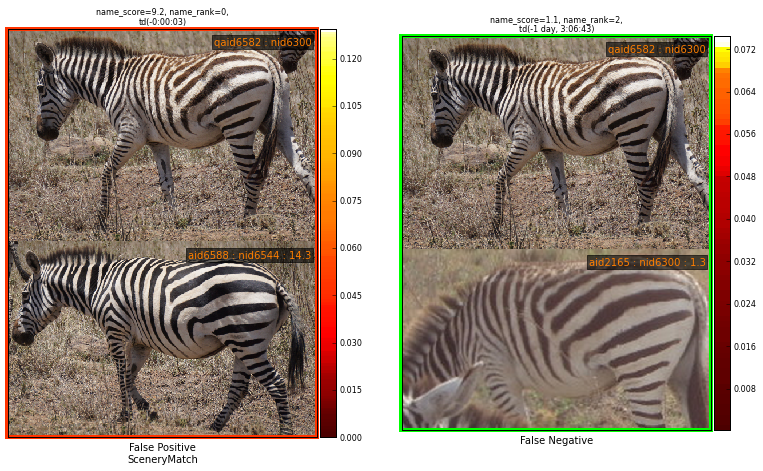

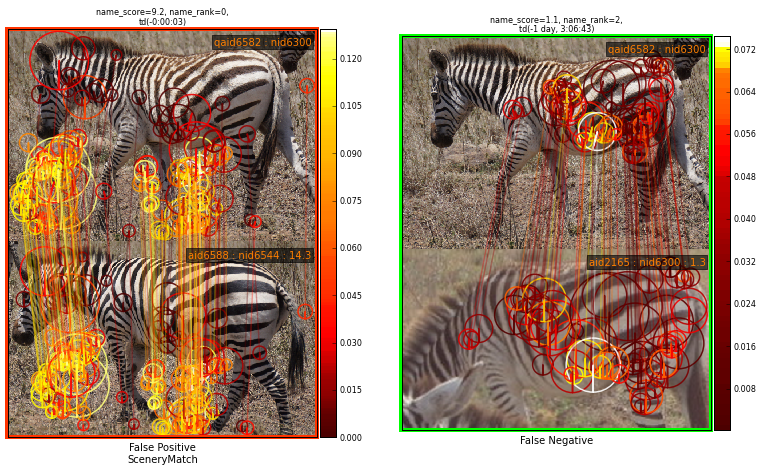

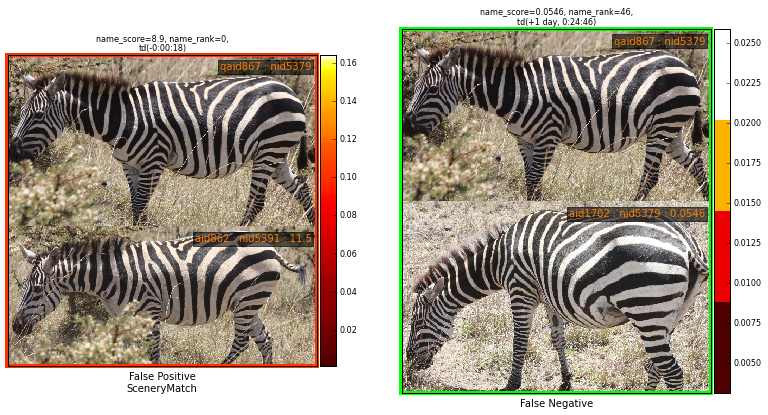

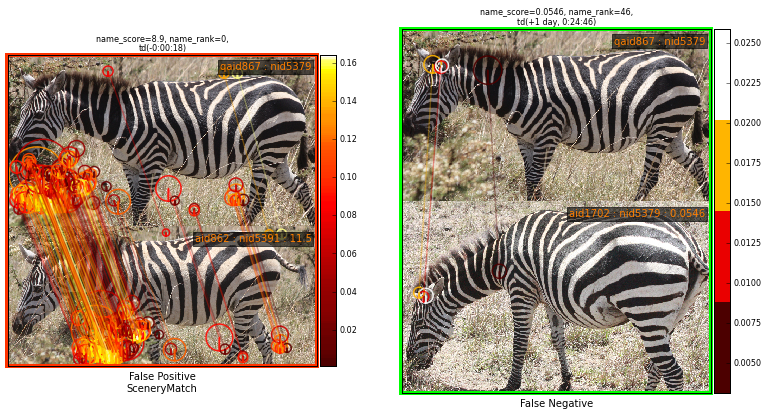

In [9]:
test_result = ibeis.run_experiment(
    e='draw_cases',
    db=db, 
    a=a, 
    t=t,
    f=[':fail=True,index=0:2,orderby=gfscore,reverse=True'],
    **draw_case_kw)
_ = test_result.draw_func()

## Interesting Tags

In [ ]:
test_result = ibeis.run_experiment(
    e='draw_cases',
    db=db, 
    a=a, 
    t=t,
    #t=['default', 'invarbest'],
    f=[':index=0:5,with_tag=interesting'],
    **draw_case_kw)
_ = test_result.draw_func()

#### Specific Interesting Tag (varying pipecfg)

Equivalent Command Line:
ibeis -e draw_cases --db PZ_Master1 -a timequalctrl -t default invarbest invarbest:SV=False --qaid= 2604 --show
argspec = ArgSpec(args=['ibs', 'test_result', 'metadata', 'f', 'show_in_notebook', 'annot_modes'], varargs=None, keywords=None, defaults=(None, None, True, None))
nointeract:     1/1...  rate=0.17 Hz, etr: 0:00:00, ellapsed: 0:00:05, wall: 15:39 EST


[autoreload of ibeis.control.IBEISControl failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AssertionError: View function mapping is overwriting an existing endpoint function: get_dbname
]


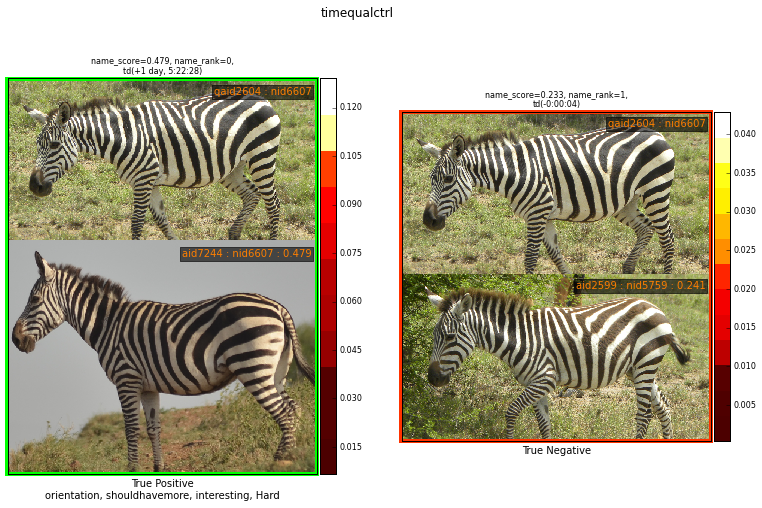

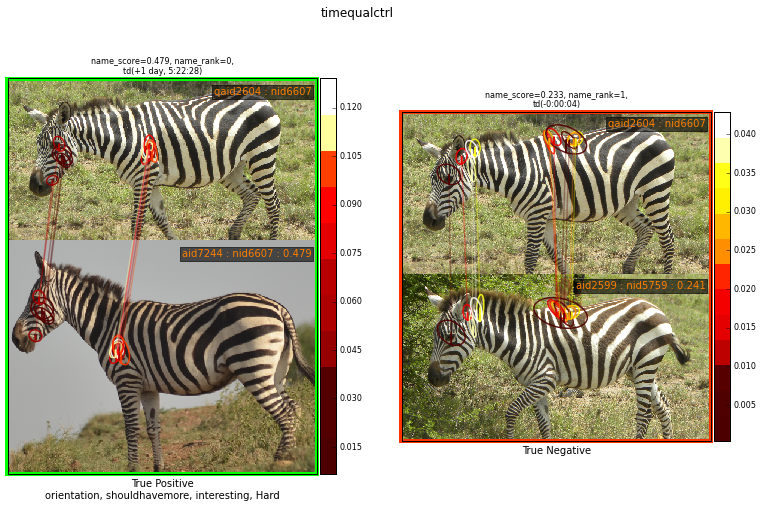

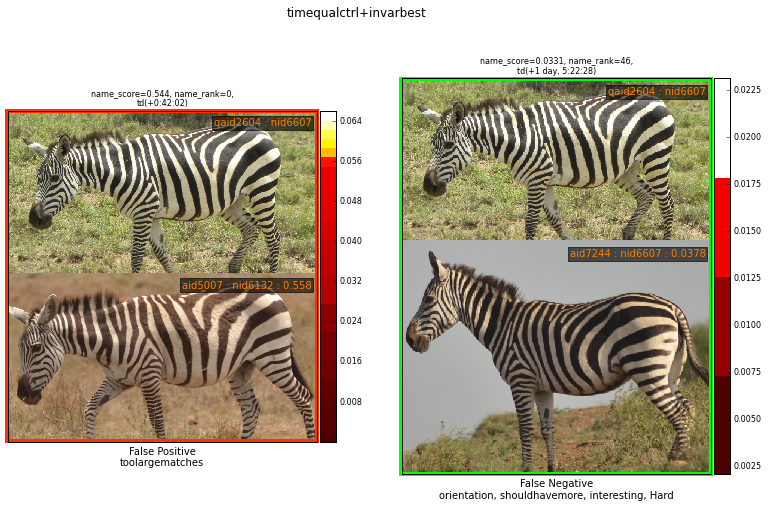

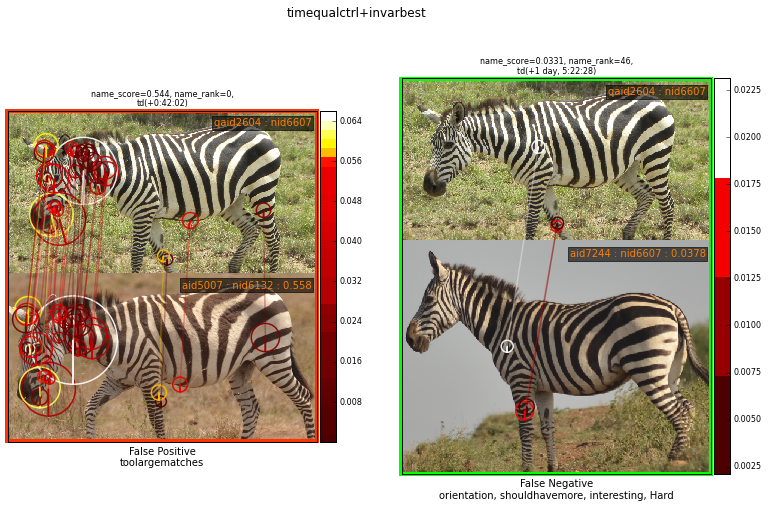

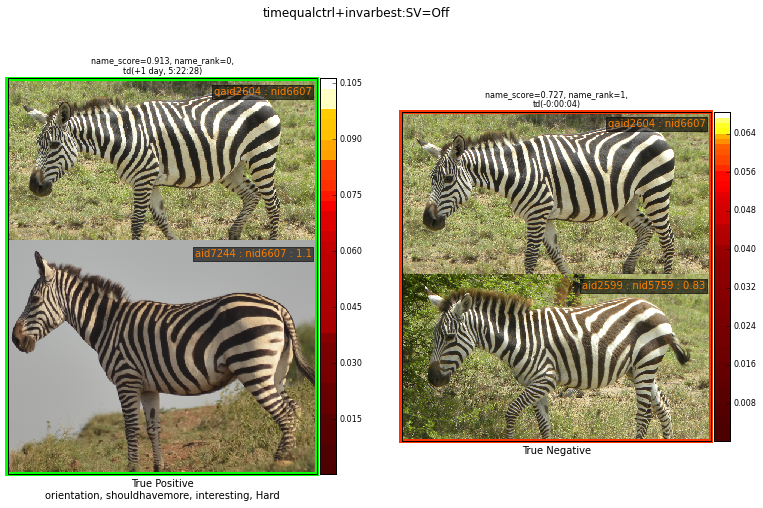

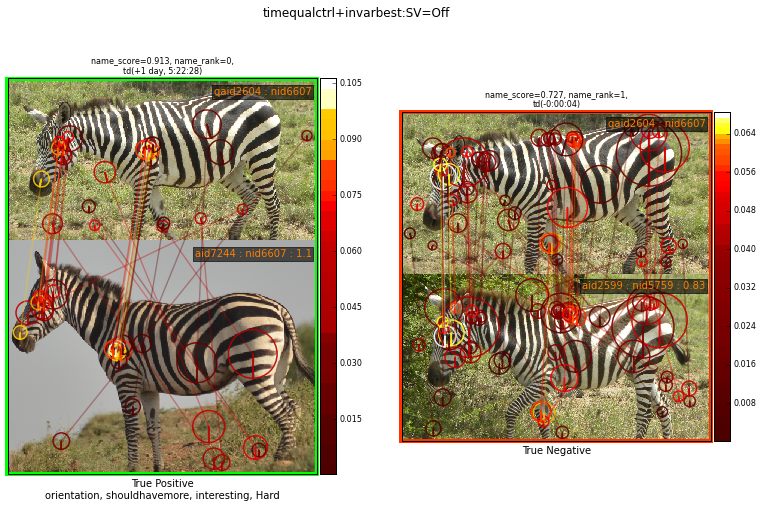

In [12]:
test_result = ibeis.run_experiment(
    e='draw_cases',
    db=db, 
    a=a, 
    #t=t,
    t=['default', 'invarbest', 'invarbest:SV=False'],
    qaid_override=[2604],
    **draw_case_kw)
_ = test_result.draw_func()

## Occlusion Tags

In [ ]:
test_result = ibeis.run_experiment(
    e='draw_cases',
    db=db, 
    a=a, 
    t=t,
    f=[':index=0:10,with_tag=occlusion,without_gf_tag=Photobomb,without_gt_tag=viewpoint'],
    **draw_case_kw)
_ = test_result.draw_func()

### Photobomb Cases

In [ ]:
test_result = ibeis.run_experiment(
    e='draw_cases',
    db=db, 
    a=a, 
    t=t,
    f=[':index=0:7:2,with_tag=Photobomb'],
    **draw_case_kw)
_ = test_result.draw_func()

It still seems unacceptable that even a correctly matched animal should have a score less than 1. 
